angle similarity

area=63.1553, angle=1.0000
Similarity between (30, 45, 30, 45) (theta phi theta phi): 32.0776

area=69.2056, angle=0.6920
Similarity between (30, 45, 60, 45) (theta phi theta phi): 34.9488

area=70.6421, angle=0.4854
Similarity between (30, 45, 90, 45) (theta phi theta phi): 35.5638

area=68.6872, angle=0.3509
Similarity between (30, 45, 120, 45) (theta phi theta phi): 34.5190

area=61.5054, angle=0.2676
Similarity between (30, 45, 150, 45) (theta phi theta phi): 30.8865



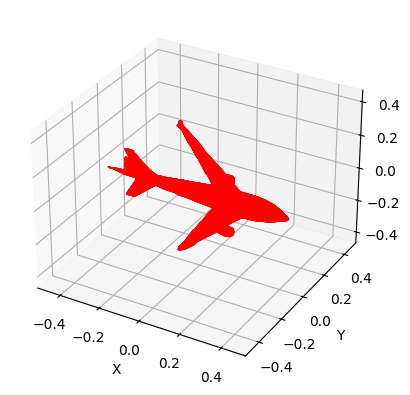

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np 
import trimesh 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def spherical_to_cartesian (theta, phi):
    """Convert spherical coordinates (azimuth theta, elevation phi) to Cartesian coordinates.""" 
    return np.array([ np.sin(phi) * np.cos(theta), np.sin(phi) * np.sin(theta), np.cos(phi) ])

def calculate_projected_area(normal, area, view_vector ):
    """Calculate the projected area of a triangle for a given view vector."""
    dot_product = np.dot(normal, view_vector) 
    return area * abs(dot_product)

def calculate_angular_change (normal1, normal2 ):
    """Calculate the angular change between two normal vectors.""" 
    cos_angle = np.dot(normal1, normal2) / (np.linalg.norm(normal1) * np.linalg.norm(normal2)) 
    cos_angle = np.clip(cos_angle, - 1.0, 1.0) # Ensure the value is within [-1, 1] to avoid numerical issues 
    return np.arccos(cos_angle)

def calculate_similarity (mesh, view1, view2, weight_area=0.5, weight_normals=0.5):
    """Calculate the similarity between two views based on projected areas and normal vector changes.""" 
    view_vector1 = spherical_to_cartesian(*view1) 
    view_vector2 = spherical_to_cartesian(*view2) # Initialize arrays for projected areas and angular changes 
    projected_areas_similarity = [] 
    angular_changes = [] # Iterate through all faces (triangles) 
    for face_idx in range(len(mesh.faces)): 
        normal = mesh.face_normals[face_idx] 
        area = mesh.area_faces[face_idx] # Calculate projected areas for both views 
        projected_area1 = calculate_projected_area(normal, area, view_vector1) 
        projected_area2 = calculate_projected_area(normal, area, view_vector2) # Calculate similarity based on projected areas (cosine similarity) 
        projected_areas_similarity.append(projected_area1 * projected_area2) # Calculate angular change between the normal vectors from both views 
        angular_change = calculate_angular_change(view_vector1, view_vector2) 
        angular_changes.append(angular_change) # Normalize projected area similarities 
        areas_similarity = np.sum(projected_areas_similarity) / (np.linalg.norm(projected_areas_similarity) + 1e-8) # Normalize angular changes (smaller changes should lead to higher similarity) 
    angular_similarity = np.exp(-np.mean(angular_changes)) # Use exponential decay for angular difference # Combine both metrics using weighted sum 
    combined_similarity = weight_area * areas_similarity + weight_normals * angular_similarity 
    print(f"area={areas_similarity:.4f}, angle={angular_similarity:.4f}")
    return combined_similarity 
    
def extract_triangle_features (mesh): 
    """Extract triangle features: vertex coordinates, interior angles, and normal vectors.""" 
    for face_idx in range(len(mesh.faces)):
        vertices = mesh.vertices[mesh.faces[face_idx]] 
        normal = mesh.face_normals[face_idx] 
        edges = np.array([np.linalg.norm(vertices[i] - vertices[(i+ 1)%3]) for i in range(3)]) # Calculate interior angles using the cosine rule 
        angles = np.array([ np.arccos(np.dot(vertices[ 1]-vertices[0], vertices[2]-vertices[0]) / (np.linalg.norm(vertices[ 1]-vertices[0]) * np.linalg.norm(vertices[ 2]-vertices[0]))), np.arccos(np.dot(vertices[ 2]-vertices[1], vertices[0]-vertices[1]) / (np.linalg.norm(vertices[ 2]-vertices[1]) * np.linalg.norm(vertices[ 0]-vertices[1]))), np.arccos(np.dot(vertices[ 0]-vertices[2], vertices[1]-vertices[2]) / (np.linalg.norm(vertices[ 0]-vertices[2]) * np.linalg.norm(vertices[ 1]-vertices[2]))) ]) 
        # print(f"Triangle {face_idx + 1}:") 
        # print(f"Vertices: \n{vertices}") 
        # print(f"Normal: {normal}") 
        # print(f"Interior angles (radians): {angles}") 
        # print("-" * 50) # Load the STL file 
        
def load_file(filename): 
    """Load OBJ file and return a trimesh object."""
    mesh = trimesh.load(filename)  # trimesh.load can handle obj files directly
    if isinstance(mesh, trimesh.Scene):
        mesh = mesh.dump(concatenate=True)
    return mesh

# def visualize_mesh(mesh):
#     """Visualize the 3D mesh using trimesh's show method."""
#     mesh.show()

def visualize_mesh_with_matplotlib(mesh,filename):
    """Visualize the 3D mesh using matplotlib."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract vertex coordinates and faces (triangles)
    vertices = mesh.vertices
    faces = mesh.faces

    # Create a Poly3DCollection for the mesh triangles
    poly3d = [[vertices[vertex] for vertex in face] for face in faces]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

    # Auto scale to the mesh size
    scale = vertices.flatten()
    ax.auto_scale_xyz(scale, scale, scale)

    # Set plot labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    plt.show()
    plt.savefig(f'{filename[7:11]}.png')


# Load your STL file 
filename = 'planes/b7fd11d4af74b4ffddaa0161e9d3dfac.obj' # Replace with your STL file path 
mesh = load_file(filename) # Extract triangle features 
# extract_triangle_features(mesh) # Define view angles (azimuth and elevation in radians) 
# view1 = (np.radians(30), np.radians( 45)) # View 1: (theta, phi) 
# view2 = (np.radians(60), np.radians( 30)) # View 2: (theta, phi) 
viewls = []
for i in range(20):
    viewls.append((np.random.randint(0,180),np.random.randint(0,360),np.random.randint(0,180),np.random.randint(0,360)))

# for view in viewls:
for view in [(30,45,30,45),(30,45,60,45),(30,45,90,45),(30,45,120,45),(30,45,150,45)]:
    view1 = (np.radians(view[0]), np.radians(view[1])) # View 1: (theta, phi) 
    view2 = (np.radians(view[2]), np.radians(view[3])) # View 2: (theta, phi) 
    # Calculate the similarity between the two views using both projected area and normal
    similarity = calculate_similarity(mesh, view1, view2, weight_area=0.5, weight_normals=0.5) 
    print(f"Similarity between {view} (theta phi theta phi): {similarity:.4f}\n")
# mesh.show()

visualize_mesh_with_matplotlib(mesh,filename)

area=0.9965, angle=1.0000
Similarity between (30, 45, 30, 45) (theta phi theta phi): 0.9983

area=0.9597, angle=0.6920
Similarity between (30, 45, 60, 45) (theta phi theta phi): 0.8259

area=0.9315, angle=0.4854
Similarity between (30, 45, 90, 45) (theta phi theta phi): 0.7085

area=0.9286, angle=0.3509
Similarity between (30, 45, 120, 45) (theta phi theta phi): 0.6398

area=0.9212, angle=0.2676
Similarity between (30, 45, 150, 45) (theta phi theta phi): 0.5944



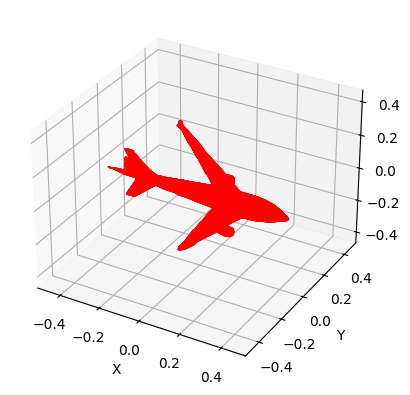

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np 
import trimesh 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import torch

def spherical_to_cartesian(theta, phi, device="cpu"):
    """Convert spherical coordinates (azimuth theta, elevation phi) to Cartesian coordinates."""
    return torch.tensor([torch.sin(phi) * torch.cos(theta),
                         torch.sin(phi) * torch.sin(theta),
                         torch.cos(phi)], device=device)

def calculate_projected_area_matrix(normals, areas, view_vector):
    """Calculate the projected area of all triangles for a given view vector."""
    dot_products = torch.matmul(normals, view_vector)  # Vectorized dot product for all normals
    return areas * torch.abs(dot_products)

def calculate_angular_change_matrix(view_vector1, view_vector2):
    """Calculate the angular change between two vectors."""
    cos_angle = torch.dot(view_vector1, view_vector2) / (torch.norm(view_vector1) * torch.norm(view_vector2))
    cos_angle = torch.clamp(cos_angle, -1.0, 1.0)  # Ensure the value is within [-1, 1] to avoid numerical issues
    return torch.acos(cos_angle)

def calculate_similarity(mesh, view1, view2, weight_area=0.5, weight_normals=0.5, device="cpu"):
    """Calculate the similarity between two views based on projected areas and normal vector changes."""
    # Convert spherical to cartesian coordinates for both views
    view_vector1 = spherical_to_cartesian(torch.tensor(view1[0], device=device), torch.tensor(view1[1], device=device), device=device)
    view_vector2 = spherical_to_cartesian(torch.tensor(view2[0], device=device), torch.tensor(view2[1], device=device), device=device)

    # Convert face normals and areas to PyTorch tensors and move them to GPU if necessary
    normals = torch.tensor(mesh.face_normals, device=device)  # (num_faces, 3)
    areas = torch.tensor(mesh.area_faces, device=device)  # (num_faces,)

    # Calculate projected areas for both views in parallel using matrix operations
    projected_area1 = calculate_projected_area_matrix(normals, areas, view_vector1)
    projected_area2 = calculate_projected_area_matrix(normals, areas, view_vector2)

    # Cosine similarity of the projected areas
    projected_areas_similarity = torch.sum(projected_area1 * projected_area2)
    areas_similarity = projected_areas_similarity / (torch.norm(projected_area1) * torch.norm(projected_area2) + 1e-8)

    # Calculate angular change between the two view vectors
    angular_change = calculate_angular_change_matrix(view_vector1, view_vector2)
    angular_similarity = torch.exp(-angular_change)

    # Combine the two metrics
    combined_similarity = weight_area * areas_similarity + weight_normals * angular_similarity
    print(f"area={areas_similarity:.4f}, angle={angular_similarity:.4f}")
    
    return combined_similarity
    
def extract_triangle_features (mesh): 
    """Extract triangle features: vertex coordinates, interior angles, and normal vectors.""" 
    for face_idx in range(len(mesh.faces)):
        vertices = mesh.vertices[mesh.faces[face_idx]] 
        normal = mesh.face_normals[face_idx] 
        edges = np.array([np.linalg.norm(vertices[i] - vertices[(i+ 1)%3]) for i in range(3)]) # Calculate interior angles using the cosine rule 
        angles = np.array([ np.arccos(np.dot(vertices[ 1]-vertices[0], vertices[2]-vertices[0]) / (np.linalg.norm(vertices[ 1]-vertices[0]) * np.linalg.norm(vertices[ 2]-vertices[0]))), np.arccos(np.dot(vertices[ 2]-vertices[1], vertices[0]-vertices[1]) / (np.linalg.norm(vertices[ 2]-vertices[1]) * np.linalg.norm(vertices[ 0]-vertices[1]))), np.arccos(np.dot(vertices[ 0]-vertices[2], vertices[1]-vertices[2]) / (np.linalg.norm(vertices[ 0]-vertices[2]) * np.linalg.norm(vertices[ 1]-vertices[2]))) ]) 
        
def load_file(filename): 
    """Load OBJ file and return a trimesh object."""
    mesh = trimesh.load(filename)  # trimesh.load can handle obj files directly
    if isinstance(mesh, trimesh.Scene):
        mesh = mesh.dump(concatenate=True)
    return mesh

def visualize_mesh_with_matplotlib(mesh, filename):
    """Visualize the 3D mesh using matplotlib."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract vertex coordinates and faces (triangles)
    vertices = mesh.vertices
    faces = mesh.faces

    # Create a Poly3DCollection for the mesh triangles
    poly3d = [[vertices[vertex] for vertex in face] for face in faces]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

    # Auto scale to the mesh size
    scale = vertices.flatten()
    ax.auto_scale_xyz(scale, scale, scale)

    # Set plot labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    plt.show()
    plt.savefig(f'{filename[7:11]}.png')

device = 'cuda:0'
# Load your STL file 
filename = 'planes/b7fd11d4af74b4ffddaa0161e9d3dfac.obj' # Replace with your STL file path 
mesh = load_file(filename)

# Define view angles (azimuth and elevation in radians) 
for view in [(30,45,30,45),(30,45,60,45),(30,45,90,45),(30,45,120,45),(30,45,150,45)]:
# for view in [(30, 45, 30, 45), (30, 45, 30, 50), (30, 45, 30, 135), (30, 45, 30, 225), (30, 45, 30, 360)]:
    view1 = (np.radians(view[0]), np.radians(view[1])) # View 1: (theta, phi) 
    view2 = (np.radians(view[2]), np.radians(view[3])) # View 2: (theta, phi) 
    # Calculate the similarity between the two views using both projected area and normal
    similarity = calculate_similarity(mesh, view1, view2, weight_area=0.5, weight_normals=0.5, device=device) 
    print(f"Similarity between {view} (theta phi theta phi): {similarity:.4f}\n")

# Visualize the mesh with Matplotlib
visualize_mesh_with_matplotlib(mesh, filename)


In [10]:
import torch
import trimesh
import numpy as np

def spherical_to_cartesian(theta, phi, device="cpu"):
    """Convert spherical coordinates (azimuth theta, elevation phi) to Cartesian coordinates."""
    return torch.tensor([torch.sin(phi) * torch.cos(theta),
                         torch.sin(phi) * torch.sin(theta),
                         torch.cos(phi)], device=device, dtype=torch.float32)

def calculate_projected_area_matrix(normals, areas, view_vector):
    """Calculate the projected area of all triangles for a given view vector."""
    dot_products = torch.matmul(normals, view_vector)  # Vectorized dot product for all normals
    return areas * torch.abs(dot_products)

def calculate_angular_change_matrix(view_vector1, view_vector2):
    """Calculate the angular change between two vectors."""
    cos_angle = torch.dot(view_vector1, view_vector2) / (torch.norm(view_vector1) * torch.norm(view_vector2))
    cos_angle = torch.clamp(cos_angle, -1.0, 1.0)  # Ensure the value is within [-1, 1] to avoid numerical issues
    return torch.acos(cos_angle)

def calculate_similarity(mesh, view1, view2, weight_area=0.5, weight_normals=0.5, device="cpu"):
    """Calculate the similarity between two views based on projected areas and normal vector changes."""
    # Convert spherical to cartesian coordinates for both views
    view_vector1 = spherical_to_cartesian(torch.tensor(view1[0], device=device), torch.tensor(view1[1], device=device), device=device)
    view_vector2 = spherical_to_cartesian(torch.tensor(view2[0], device=device), torch.tensor(view2[1], device=device), device=device)

    # Convert face normals and areas to PyTorch tensors and move them to GPU if necessary
    normals = torch.tensor(mesh.face_normals, dtype=torch.float32, device=device)  # (num_faces, 3)
    areas = torch.tensor(mesh.area_faces, dtype=torch.float32, device=device)  # (num_faces,)

    # Calculate projected areas for both views in parallel using matrix operations
    projected_area1 = calculate_projected_area_matrix(normals, areas, view_vector1)
    projected_area2 = calculate_projected_area_matrix(normals, areas, view_vector2)

    # Cosine similarity of the projected areas
    projected_areas_similarity = torch.sum(projected_area1 * projected_area2)
    areas_similarity = projected_areas_similarity / (torch.norm(projected_area1) * torch.norm(projected_area2) + 1e-8)

    # Calculate angular change between the two view vectors (no need for face-wise angular change)
    angular_change = calculate_angular_change_matrix(view_vector1, view_vector2)
    angular_similarity = torch.exp(-angular_change)

    # Combine the two metrics
    combined_similarity = weight_area * areas_similarity + weight_normals * angular_similarity

    print(f"area={areas_similarity:.4f}, angle={angular_similarity:.4f}")
    
    return combined_similarity

# Example usage
device = 'cuda:0'
# Load your STL file (adjust path accordingly)
filename = 'planes/b7fd11d4af74b4ffddaa0161e9d3dfac.obj'
mesh = trimesh.load(filename)  # Use trimesh to load the mesh

# Example view angles (azimuth and elevation in degrees)
views = [(30, 45, 30, 45), (30, 45, 60, 45), (30, 45, 90, 45), (30, 45, 120, 45), (30, 45, 150, 45)]

for view in views:
    view1 = (np.radians(torch.tensor(view[0], device=device)), np.radians(torch.tensor(view[1], device=device)))
    view2 = (np.radians(torch.tensor(view[2], device=device)), np.radians(torch.tensor(view[3], device=device)))
    
    # Calculate the similarity between the two views using both projected area and normal
    similarity = calculate_similarity(mesh, view1, view2, weight_area=0.5, weight_normals=0.5, device=device)
    print(f"Similarity between {view} (theta phi theta phi): {similarity:.4f}\n")

''' 不能用这个 还是得遍历。。
area=0.9965, angle=1.0000
Similarity between (30, 45, 30, 45) (theta phi theta phi): 0.9983

area=0.9597, angle=0.6920
Similarity between (30, 45, 60, 45) (theta phi theta phi): 0.8259

area=0.9315, angle=0.4854
Similarity between (30, 45, 90, 45) (theta phi theta phi): 0.7085

area=0.9286, angle=0.3509
Similarity between (30, 45, 120, 45) (theta phi theta phi): 0.6398

area=0.9212, angle=0.2676
Similarity between (30, 45, 150, 45) (theta phi theta phi): 0.5944

/tmp/ipykernel_587516/810962367.py:61: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  view1 = (np.radians(torch.tensor(view[0], device=device)), np.radians(torch.tensor(view[1], device=device)))
/tmp/ipykernel_587516/810962367.py:62: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  view2 = (np.radians(torch.tensor(view[2], device=device)), np.radians(torch.tensor(view[3], device=device)))
/tmp/ipykernel_587516/810962367.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  view_vector1 = spherical_to_cartesian(torch.tensor(view1[0], device=device), torch.tensor(view1[1], device=device), device=device)
/tmp/ipykernel_587516/810962367.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  view_vector2 = spherical_to_cartesian(torch.tensor(view2[0], device=device), torch.tensor(view2[1], device=device), device=device)
'''


area=0.9965, angle=1.0000
Similarity between (30, 45, 30, 45) (theta phi theta phi): 0.9983

area=0.9597, angle=0.6920
Similarity between (30, 45, 60, 45) (theta phi theta phi): 0.8259

area=0.9315, angle=0.4854
Similarity between (30, 45, 90, 45) (theta phi theta phi): 0.7085

area=0.9286, angle=0.3509
Similarity between (30, 45, 120, 45) (theta phi theta phi): 0.6398

area=0.9212, angle=0.2676
Similarity between (30, 45, 150, 45) (theta phi theta phi): 0.5944



/tmp/ipykernel_587516/810962367.py:61: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  view1 = (np.radians(torch.tensor(view[0], device=device)), np.radians(torch.tensor(view[1], device=device)))
/tmp/ipykernel_587516/810962367.py:62: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  view2 = (np.radians(torch.tensor(view[2], device=device)), np.radians(torch.tensor(view[3], device=device)))
/tmp/ipykernel_587516/810962367.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  view_vector1 = spherical_to_cartesian(torch.tensor(view1[0], device=device), torch.tensor(view1[1], device=device), device=device)
/tmp/ipykernel_587516/810962367.py:26: UserWarning: To copy 

# 这个好 就用这个 挺快的

In [12]:
# 变快了，但是还是用的循环
import torch
import trimesh
import numpy as np

def spherical_to_cartesian(theta, phi, device="cpu"):
    """Convert spherical coordinates (azimuth theta, elevation phi) to Cartesian coordinates."""
    return torch.tensor([torch.sin(phi) * torch.cos(theta),
                         torch.sin(phi) * torch.sin(theta),
                         torch.cos(phi)], device=device)

def calculate_projected_area(normal, area, view_vector):
    """Calculate the projected area of a triangle for a given view vector."""
    dot_product = torch.dot(normal, view_vector)  # Scalar dot product
    return area * torch.abs(dot_product)

def calculate_angular_change(normal1, normal2):
    """Calculate the angular change between two normal vectors."""
    cos_angle = torch.dot(normal1, normal2) / (torch.norm(normal1) * torch.norm(normal2))
    cos_angle = torch.clamp(cos_angle, -1.0, 1.0)  # Ensure the value is within [-1, 1]
    return torch.acos(cos_angle)

def calculate_similarity(mesh, view1, view2, weight_area=0.5, weight_normals=0.5, device="cpu"):
    """Calculate the similarity between two views based on projected areas and normal vector changes."""
    # Convert spherical to cartesian coordinates for both views
    view_vector1 = spherical_to_cartesian(torch.tensor(view1[0], device=device), torch.tensor(view1[1], device=device), device=device)
    view_vector2 = spherical_to_cartesian(torch.tensor(view2[0], device=device), torch.tensor(view2[1], device=device), device=device)

    # Convert face normals and areas to PyTorch tensors and move them to GPU if necessary
    normals = torch.tensor(mesh.face_normals, device=device)  # (num_faces, 3)
    areas = torch.tensor(mesh.area_faces, device=device)  # (num_faces,)

    # Initialize arrays for projected areas and angular changes
    projected_areas_similarity = []
    angular_changes = []

    # Iterate through all faces (triangles)
    for face_idx in range(len(mesh.faces)):
        normal = normals[face_idx]  # Normal of the face
        area = areas[face_idx]  # Area of the face

        # Calculate projected areas for both views
        projected_area1 = calculate_projected_area(normal, area, view_vector1)
        projected_area2 = calculate_projected_area(normal, area, view_vector2)

        # Accumulate the product of projected areas (cosine similarity)
        projected_areas_similarity.append(projected_area1 * projected_area2)

        # Calculate angular change between the two view vectors
    angular_change = calculate_angular_change(view_vector1, view_vector2)
        # angular_changes.append(angular_change)

    # Normalize projected area similarities (cosine similarity)
    projected_areas_similarity = torch.tensor(projected_areas_similarity, device=device)
    areas_similarity = torch.sum(projected_areas_similarity) / (torch.norm(projected_areas_similarity) + 1e-8)

    # Normalize angular changes (smaller changes should lead to higher similarity)
    angular_changes = torch.tensor(angular_changes, device=device)
    angular_similarity = torch.exp(-angular_change)  # Use exponential decay for angular difference

    # Combine both metrics using weighted sum
    combined_similarity = weight_area * areas_similarity + weight_normals * angular_similarity

    print(f"area={areas_similarity:.4f}, angle={angular_similarity:.4f}")
    return combined_similarity

# Example usage
device = 'cuda:0'
# Load your STL file (adjust path accordingly)
filename = 'planes/b7fd11d4af74b4ffddaa0161e9d3dfac.obj'
mesh = trimesh.load(filename)  # Use trimesh to load the mesh

# Example view angles (azimuth and elevation in degrees)
views = [(30, 45, 30, 45), (30, 45, 60, 45), (30, 45, 90, 45), (30, 45, 120, 45), (30, 45, 150, 45)]

for view in views:
    view1 = (np.radians(view[0]), np.radians(view[1]))
    # view1 = (np.radians(torch.tensor(view[0], device=device)), np.radians(torch.tensor(view[1], device=device)))
    view2 = (np.radians(view[2]), np.radians(view[3]))
    # view2 = (np.radians(torch.tensor(view[2], device=device)), np.radians(torch.tensor(view[3], device=device)))
    
    # Calculate the similarity between the two views using both projected area and normal
    similarity = calculate_similarity(mesh, view1, view2, weight_area=0.5, weight_normals=0.5, device=device)
    print(f"Similarity between {view} (theta phi theta phi): {similarity:.4f}\n")


area=63.1553, angle=1.0000
Similarity between (30, 45, 30, 45) (theta phi theta phi): 32.0776

area=69.2056, angle=0.6920
Similarity between (30, 45, 60, 45) (theta phi theta phi): 34.9488

area=70.6421, angle=0.4854
Similarity between (30, 45, 90, 45) (theta phi theta phi): 35.5638

area=68.6872, angle=0.3509
Similarity between (30, 45, 120, 45) (theta phi theta phi): 34.5190

area=61.5054, angle=0.2676
Similarity between (30, 45, 150, 45) (theta phi theta phi): 30.8865



In [17]:
import torch
import trimesh
import numpy as np

def spherical_to_cartesian(theta, phi, device="cpu"):
    """Convert spherical coordinates (azimuth theta, elevation phi) to Cartesian coordinates."""
    return torch.tensor([torch.sin(phi) * torch.cos(theta),
                         torch.sin(phi) * torch.sin(theta),
                         torch.cos(phi)], device=device,dtype=torch.float32)

def calculate_projected_area(normal, area, view_vector):
    """Calculate the projected area of a triangle for a given view vector."""
    dot_product = torch.dot(normal, view_vector)  # Scalar dot product
    return area * torch.abs(dot_product)

def calculate_angular_change_with_periodicity(theta1, phi1, theta2, phi2):
    """Calculate the angular change between two spherical angles, considering periodicity."""
    # Convert spherical coordinates into unit vectors using sin and cos for periodicity
    x1, y1 = torch.cos(theta1), torch.sin(theta1)
    x2, y2 = torch.cos(theta2), torch.sin(theta2)
    # Compute angular differences considering periodicity for both azimuth and elevation
    theta_diff = torch.acos(torch.clamp(x1 * x2 + y1 * y2, -1.0, 1.0))
    # For elevation (phi), it's simpler as we can treat it like the azimuth
    phi_diff = torch.abs(phi1 - phi2)
    phi_diff = torch.minimum(phi_diff, 2 * np.pi - phi_diff)  # Wrap around periodicity for phi

    return theta_diff, phi_diff

def calculate_similarity(mesh, view1, view2, weight_area=0.5, weight_normals=0.5, device="cpu"):
    """Calculate the similarity between two views based on projected areas and normal vector changes."""
    # Convert spherical to cartesian coordinates for both views
    view_vector1 = spherical_to_cartesian(torch.tensor(view1[0], device=device), torch.tensor(view1[1], device=device), device=device)
    view_vector2 = spherical_to_cartesian(torch.tensor(view2[0], device=device), torch.tensor(view2[1], device=device), device=device)

    # Convert face normals and areas to PyTorch tensors and move them to GPU if necessary
    normals = torch.tensor(mesh.face_normals, dtype=torch.float32, device=device)  # (num_faces, 3)
    areas = torch.tensor(mesh.area_faces, dtype=torch.float32, device=device)  # (num_faces,)

    # Initialize arrays for projected areas and angular changes
    projected_areas_similarity = []
    angular_changes = []

    # Iterate through all faces (triangles)
    for face_idx in range(len(mesh.faces)):
        normal = normals[face_idx]  # Normal of the face
        area = areas[face_idx]  # Area of the face

        # Calculate projected areas for both views
        projected_area1 = calculate_projected_area(normal, area, view_vector1)
        projected_area2 = calculate_projected_area(normal, area, view_vector2)

        # Accumulate the product of projected areas (cosine similarity)
        projected_areas_similarity.append(projected_area1 * projected_area2)

    # Normalize projected area similarities (cosine similarity)
    projected_areas_similarity = torch.tensor(projected_areas_similarity, device=device)
    areas_similarity = torch.sum(projected_areas_similarity) / (torch.norm(projected_areas_similarity) + 1e-8)

    # Calculate angular change between the two view vectors with periodicity handling
    theta_diff, phi_diff = calculate_angular_change_with_periodicity(
        torch.tensor(view1[0], device=device),
        torch.tensor(view1[1], device=device),
        torch.tensor(view2[0], device=device),
        torch.tensor(view2[1], device=device)
    )
    
    # Use exponential decay for both angular differences (theta and phi)
    angular_similarity_theta = torch.exp(-theta_diff)
    angular_similarity_phi = torch.exp(-phi_diff)

    # Combine the two angular similarities with exponential decay for overall angular similarity
    angular_similarity = (angular_similarity_theta + angular_similarity_phi) / 2

    # Combine both metrics using weighted sum
    combined_similarity = weight_area * areas_similarity + weight_normals * angular_similarity

    print(f"area={areas_similarity:.4f}, angle={angular_similarity:.4f}")
    return combined_similarity

# Example usage
device = 'cuda:0'
# Load your STL file (adjust path accordingly)
filename = 'planes/b7fd11d4af74b4ffddaa0161e9d3dfac.obj'
mesh = trimesh.load(filename)  # Use trimesh to load the mesh

# Example view angles (azimuth and elevation in degrees)
views = [(30, 45, 30, 45), (30, 45, 60, 45), (30, 45, 90, 45), (30, 45, 120, 45), (30, 45, 150, 45)]

for view in views:
    view1 = (np.radians(view[0]), np.radians(view[1]))
    view2 = (np.radians(view[2]), np.radians(view[3]))
    
    # Calculate the similarity between the two views using both projected area and normal
    similarity = calculate_similarity(mesh, view1, view2, weight_area=0.5, weight_normals=0., device=device) #想起来应该有周期性，所以可以把单独的角度分量去掉
    print(f"Similarity between {view} (theta phi theta phi): {similarity:.4f}\n")


area=63.1553, angle=1.0000
Similarity between (30, 45, 30, 45) (theta phi theta phi): 31.5776

area=69.2056, angle=0.7962
Similarity between (30, 45, 60, 45) (theta phi theta phi): 34.6028

area=70.6421, angle=0.6755
Similarity between (30, 45, 90, 45) (theta phi theta phi): 35.3211

area=68.6872, angle=0.6039
Similarity between (30, 45, 120, 45) (theta phi theta phi): 34.3436

area=61.5054, angle=0.5616
Similarity between (30, 45, 150, 45) (theta phi theta phi): 30.7527



In [22]:
import torch
import trimesh
import numpy as np

def spherical_to_cartesian(theta, phi, device="cpu"):
    """Convert spherical coordinates (azimuth theta, elevation phi) to Cartesian coordinates."""
    return torch.tensor([torch.sin(phi) * torch.cos(theta),
                         torch.sin(phi) * torch.sin(theta),
                         torch.cos(phi)], device=device,dtype=torch.float32)

def calculate_projected_area(normal, area, view_vector):
    """Calculate the projected area of a triangle for a given view vector."""
    dot_product = torch.dot(normal, view_vector)  # Scalar dot product
    return area * torch.abs(dot_product)

def calculate_angular_change_with_periodicity(theta1, phi1, theta2, phi2):
    """Calculate the angular change between two spherical angles, considering periodicity."""
    # Convert spherical coordinates into unit vectors using sin and cos for periodicity
    x1, y1 = torch.cos(theta1), torch.sin(theta1)
    x2, y2 = torch.cos(theta2), torch.sin(theta2)
    # Compute angular differences considering periodicity for both azimuth and elevation
    theta_diff = torch.acos(torch.clamp(x1 * x2 + y1 * y2, -1.0, 1.0))
    # For elevation (phi), it's simpler as we can treat it like the azimuth
    phi_diff = torch.abs(phi1 - phi2)
    phi_diff = torch.minimum(phi_diff, 2 * np.pi - phi_diff)  # Wrap around periodicity for phi

    return theta_diff, phi_diff

def calculate_similarity(mesh, view1, view2, weight_area=0.5, weight_normals=0.5, device="cpu"):
    """Calculate the similarity between two views based on projected areas and normal vector changes."""
    # Convert spherical to cartesian coordinates for both views
    view_vector1 = spherical_to_cartesian(torch.tensor(view1[0], device=device), torch.tensor(view1[1], device=device), device=device)
    view_vector2 = spherical_to_cartesian(torch.tensor(view2[0], device=device), torch.tensor(view2[1], device=device), device=device)

    # Convert face normals and areas to PyTorch tensors and move them to GPU if necessary
    normals = torch.tensor(mesh.face_normals, dtype=torch.float32, device=device)  # (num_faces, 3)
    areas = torch.tensor(mesh.area_faces, dtype=torch.float32, device=device)  # (num_faces,)

    # Initialize arrays for projected areas and angular changes
    projected_areas_similarity = []

    # Iterate through all faces (triangles)
    for face_idx in range(len(mesh.faces)):
        normal = normals[face_idx]  # Normal of the face
        area = areas[face_idx]  # Area of the face

        # Calculate projected areas for both views
        projected_area1 = calculate_projected_area(normal, area, view_vector1)
        projected_area2 = calculate_projected_area(normal, area, view_vector2)

        # Accumulate the product of projected areas (cosine similarity)
        projected_areas_similarity.append(projected_area1 * projected_area2)

    # Sum of projected area similarities
    projected_areas_similarity = torch.tensor(projected_areas_similarity, device=device)
    areas_similarity = torch.sum(projected_areas_similarity) / (torch.norm(projected_areas_similarity) + 1e-8)

    # Calculate angular change between the two view vectors with periodicity handling
    theta_diff, phi_diff = calculate_angular_change_with_periodicity(
        torch.tensor(view1[0], device=device),
        torch.tensor(view1[1], device=device),
        torch.tensor(view2[0], device=device),
        torch.tensor(view2[1], device=device)
    )
    
    # Use exponential decay for both angular differences (theta and phi)
    angular_similarity_theta = torch.exp(-theta_diff)
    angular_similarity_phi = torch.exp(-phi_diff)

    # Combine the two angular similarities with exponential decay for overall angular similarity
    angular_similarity = (angular_similarity_theta + angular_similarity_phi) / 2

    # Combine both metrics using weighted sum
    combined_similarity = weight_area * areas_similarity + weight_normals * angular_similarity

    print(f"area={areas_similarity:.4f}, angle={angular_similarity:.4f}")
    return combined_similarity

# Example usage
device = 'cuda:0'
# Load your STL file (adjust path accordingly)
filename = 'planes/b7fd11d4af74b4ffddaa0161e9d3dfac.obj'
mesh = trimesh.load(filename)  # Use trimesh to load the mesh

# Example view angles (azimuth and elevation in degrees)
# views = [(30, 45, 30, 45), (30, 45, 60, 45), (30, 45, 90, 45), (30, 45, 120, 45), (30, 45, 150, 45)]
# for view in views:
for i in range(20):
        viewls.append((np.random.randint(0,180),np.random.randint(0,360),np.random.randint(0,180),np.random.randint(0,360)))
for view in viewls:
    view1 = (np.radians(view[0]), np.radians(view[1]))
    view2 = (np.radians(view[2]), np.radians(view[3]))
    
    # Calculate the similarity between the two views using both projected area and normal
    similarity = calculate_similarity(mesh, view1, view2, weight_area=0.01, weight_normals=0., device=device) #想起来应该有周期性，所以可以把单独的角度分量去掉
    print(f"Similarity between {view} (theta phi theta phi): {similarity:.4f}\n")


area=41.8609, angle=0.4986
Similarity between (12, 264, 20, 22) (theta phi theta phi): 0.4186

area=50.9776, angle=0.1731
Similarity between (5, 117, 107, 216) (theta phi theta phi): 0.5098

area=53.8629, angle=0.4423
Similarity between (41, 201, 165, 216) (theta phi theta phi): 0.5386

area=58.0795, angle=0.1993
Similarity between (132, 344, 61, 217) (theta phi theta phi): 0.5808

area=72.9915, angle=0.3897
Similarity between (79, 42, 53, 291) (theta phi theta phi): 0.7299

area=54.8996, angle=0.6457
Similarity between (63, 166, 21, 154) (theta phi theta phi): 0.5490

area=67.1566, angle=0.2809
Similarity between (121, 32, 35, 94) (theta phi theta phi): 0.6716

area=63.3411, angle=0.0999
Similarity between (35, 71, 147, 268) (theta phi theta phi): 0.6334

area=71.6766, angle=0.5132
Similarity between (117, 288, 42, 272) (theta phi theta phi): 0.7168

area=63.3870, angle=0.4161
Similarity between (80, 294, 46, 7) (theta phi theta phi): 0.6339

area=42.1990, angle=0.4281
Similarity betw